In [108]:
import os
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
cust=pd.read_csv("C:/Users/hp/Downloads/Customers.csv")
tran=pd.read_csv("C:/Users/hp/Downloads/Transactions.csv")

In [3]:
cust

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [4]:
tran

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
full_data=pd.merge(cust,tran,on='CustomerID')

In [6]:
full_data

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40


In [206]:
customer_data = full_data.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count'),
    AvgOrderValue=('TotalValue', 'mean')
).reset_index()

In [208]:
customer_data = customer_data.merge(cust[['CustomerID', 'Region']], on='CustomerID', how='left')

In [209]:
scaler = MinMaxScaler()
numerical_features = ['TotalSpending', 'TransactionCount', 'AvgOrderValue']
customer_data_scaled = scaler.fit_transform(customer_data[numerical_features])

In [210]:
customer_data_scaled

array([[0.30894178, 0.4       , 0.47433644],
       [0.16809501, 0.3       , 0.30894039],
       [0.24954138, 0.3       , 0.48275135],
       [0.49780626, 0.7       , 0.47309205],
       [0.18428723, 0.2       , 0.48011993],
       [0.39137101, 0.3       , 0.78542347],
       [0.2357983 , 0.2       , 0.62668981],
       [0.39552906, 0.9       , 0.27789201],
       [0.07686723, 0.2       , 0.17446646],
       [0.15438686, 0.3       , 0.27968646],
       [0.34439282, 0.4       , 0.53485998],
       [0.48613465, 0.6       , 0.53592614],
       [0.5587683 , 0.6       , 0.62449993],
       [0.02231032, 0.        , 0.19044574],
       [0.10150772, 0.1       , 0.40005695],
       [0.35802827, 0.4       , 0.55813901],
       [0.44105704, 0.7       , 0.41253909],
       [0.44370349, 0.4       , 0.70440747],
       [0.19859869, 0.5       , 0.22723194],
       [0.07931353, 0.        , 0.67703744],
       [0.50394703, 0.7       , 0.47964442],
       [0.43173353, 0.5       , 0.55891353],
       [0.

In [221]:
sse=[]

In [222]:
k_rng=range(3,10)
for i in k_rng:
    km=KMeans(n_clusters=i)
    km.fit_predict(customer_data_scaled)
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [223]:
sse

[9.381445631636549,
 7.206432683087279,
 5.728050499545391,
 4.807136789716825,
 4.082037830304767,
 3.651308051215147,
 3.2948372105115777]

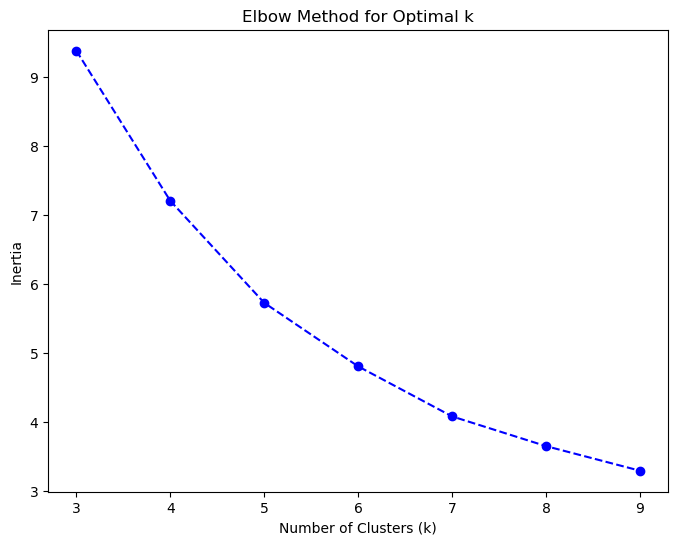

In [224]:
plt.figure(figsize=(8, 6))
plt.plot(k_rng, sse, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [225]:
optimal_k=5

In [226]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [227]:
db_index = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])

In [228]:
db_index

0.8530962743209303

In [229]:
centroids=kmeans.cluster_centers_

In [230]:
centroids

array([[0.40567914, 0.31785714, 0.78982179],
       [0.55751835, 0.6952381 , 0.54874776],
       [0.19248723, 0.20869565, 0.5045736 ],
       [0.30425637, 0.48      , 0.40027411],
       [0.07452548, 0.15652174, 0.20340401]])

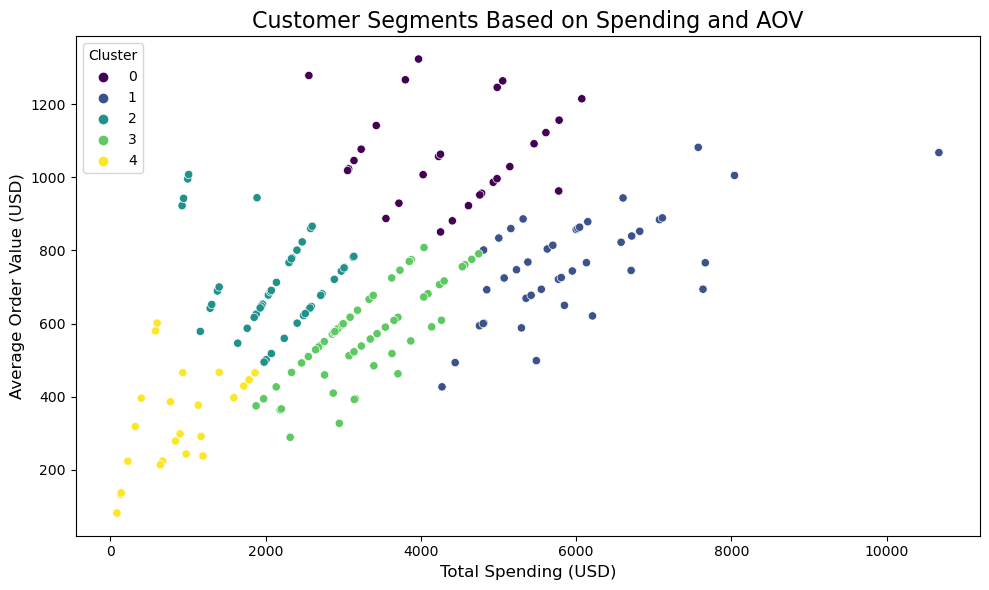

In [231]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_data['TotalSpending'],
    y=customer_data['AvgOrderValue'],
    hue=customer_data['Cluster'],
    palette='viridis'
)
plt.title('Customer Segments Based on Spending and AOV', fontsize=16)
plt.xlabel('Total Spending (USD)', fontsize=12)
plt.ylabel('Average Order Value (USD)', fontsize=12)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()